<a href="https://colab.research.google.com/github/AmazingGrace-D/Long-distance-problem-with-RNN/blob/main/Long_distance_problem_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import (Input, Dense, GRU, SimpleRNN, LSTM, 
                                     Flatten, GlobalMaxPool1D)
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, Adagrad

In [2]:
# The dataset will be based on the XOR problem on 3 parity set
# Long distance and short distance patterns will be mimicked 

T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
  if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
    return 1
  if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
    return 1
  if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
    return 1
  return 0

for t in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, -1, -2, -3) # last 3 values - short distance
  Y.append(y)

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)

print("X Shape -", X.shape, "Y Shape -", Y.shape, "Length - ", N)

X Shape - (5000, 10, 1) Y Shape - (5000,) Length -  5000


In [3]:
# SimpleRNN model

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr=0.01),
    metrics = ['accuracy']
)


In [4]:
r = model.fit(
    X, Y, 
    epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 8ms/step - loss: 0.7596 - accuracy: 0.4898 - val_loss: 0.6943 - val_accuracy: 0.5340
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.5182 - val_loss: 0.6941 - val_accuracy: 0.5320
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6935 - accuracy: 0.5154 - val_loss: 0.6943 - val_accuracy: 0.4968
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6924 - accuracy: 0.5197 - val_loss: 0.6932 - val_accuracy: 0.5012
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6909 - accuracy: 0.5228 - val_loss: 0.6852 - val_accuracy: 0.5444
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6783 - accuracy: 0.5650 - val_loss: 0.6443 - val_accuracy: 0.6960
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6192 - accuracy: 0.7220 - val_loss: 0.5688 - val_accuracy: 0.7368
Epoch 8/200
7

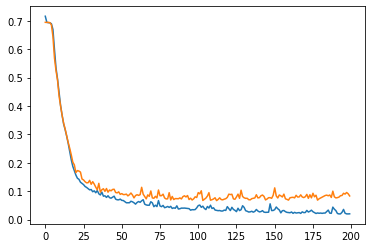

In [5]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

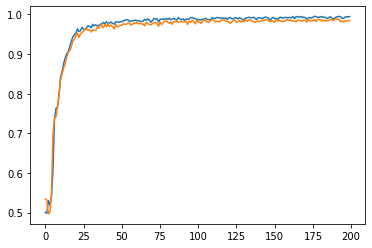

In [6]:
plt.plot(r.history['accuracy'], label = 'loss')
plt.plot(r.history['val_accuracy'], label = 'val_acc')

In [7]:
# GRU Model

i = Input(shape=(T, D))
x = GRU(2)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    optimizer=Adam(lr = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 300, validation_split = 0.5)

Epoch 1/300
79/79 [==============================] - 2s 9ms/step - loss: 0.6930 - accuracy: 0.5204 - val_loss: 0.6860 - val_accuracy: 0.5492
Epoch 2/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6762 - accuracy: 0.5774 - val_loss: 0.6467 - val_accuracy: 0.6356
Epoch 3/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6425 - accuracy: 0.6438 - val_loss: 0.6267 - val_accuracy: 0.6620
Epoch 4/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.6615 - val_loss: 0.6124 - val_accuracy: 0.6828
Epoch 5/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6215 - accuracy: 0.6706 - val_loss: 0.6045 - val_accuracy: 0.6760
Epoch 6/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6007 - accuracy: 0.7028 - val_loss: 0.5995 - val_accuracy: 0.6892
Epoch 7/300
79/79 [==============================] - 0s 5ms/step - loss: 0.6023 - accuracy: 0.6970 - val_loss: 0.5971 - val_accuracy: 0.6884
Epoch 8/300
7

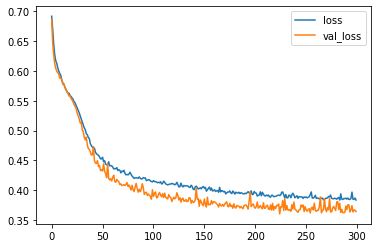

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

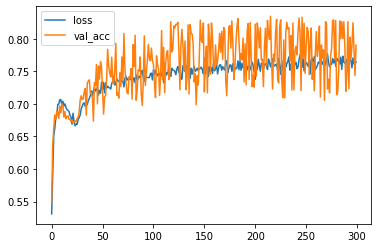

In [9]:
plt.plot(r.history['accuracy'], label = 'loss')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [10]:
# LSTM 

i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    optimizer=Adam(lr = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 10ms/step - loss: 0.6976 - accuracy: 0.4876 - val_loss: 0.6933 - val_accuracy: 0.4920
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6935 - accuracy: 0.5153 - val_loss: 0.6924 - val_accuracy: 0.5172
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.5472 - val_loss: 0.6767 - val_accuracy: 0.5480
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6449 - accuracy: 0.6157 - val_loss: 0.5180 - val_accuracy: 0.7984
Epoch 5/200
79/79 [==============================] - 0s 5ms/step - loss: 0.4312 - accuracy: 0.8664 - val_loss: 0.3075 - val_accuracy: 0.9204
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.2677 - accuracy: 0.9415 - val_loss: 0.2068 - val_accuracy: 0.9456
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.1731 - accuracy: 0.9590 - val_loss: 0.1515 - val_accuracy: 0.9644
Epoch 8/200


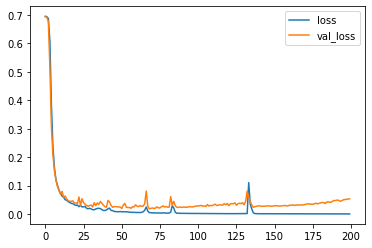

In [11]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

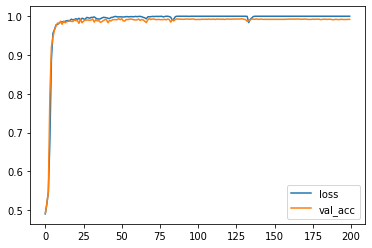

In [12]:
plt.plot(r.history['accuracy'], label = 'loss')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [13]:
# For the long distance problem

T = 10
D = 1
X = []
Y = []

for _ in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # first 3 values - long distance
  Y.append(y)

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)

print("X Shape -", X.shape, "Y Shape -", Y.shape, "Length - ", N)

X Shape - (5000, 10, 1) Y Shape - (5000,) Length -  5000


In [14]:
# SimpleRNN model

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr=0.01),
    metrics = ['accuracy']
)

r = model.fit(
    X, Y, 
    epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 1s 5ms/step - loss: 0.6958 - accuracy: 0.5277 - val_loss: 0.6901 - val_accuracy: 0.5424
Epoch 2/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6868 - accuracy: 0.5579 - val_loss: 0.6883 - val_accuracy: 0.5444
Epoch 3/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5194 - val_loss: 0.6962 - val_accuracy: 0.5500
Epoch 4/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6873 - accuracy: 0.5620 - val_loss: 0.6848 - val_accuracy: 0.5500
Epoch 5/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6819 - accuracy: 0.5565 - val_loss: 0.6777 - val_accuracy: 0.5620
Epoch 6/200
79/79 [==============================] - 0s 3ms/step - loss: 0.6585 - accuracy: 0.5943 - val_loss: 0.6298 - val_accuracy: 0.6556
Epoch 7/200
79/79 [==============================] - 0s 3ms/step - loss: 0.5907 - accuracy: 0.6832 - val_loss: 0.4093 - val_accuracy: 0.8248
Epoch 8/200
7

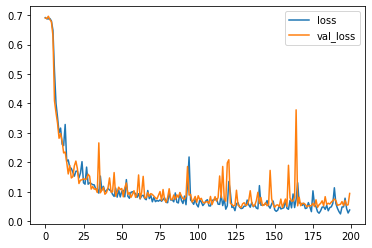

In [15]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

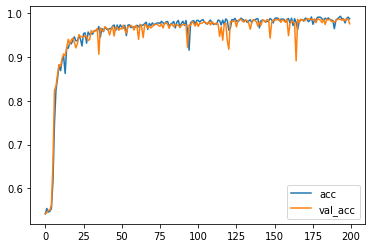

In [16]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [17]:
# LSTM model 

i = Input(shape=(T, D))
x = LSTM(5)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    optimizer=Adam(lr = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 9ms/step - loss: 0.6941 - accuracy: 0.4906 - val_loss: 0.6932 - val_accuracy: 0.5064
Epoch 2/200
79/79 [==============================] - 1s 6ms/step - loss: 0.6940 - accuracy: 0.4893 - val_loss: 0.6933 - val_accuracy: 0.5044
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5184 - val_loss: 0.6935 - val_accuracy: 0.4872
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6939 - accuracy: 0.4953 - val_loss: 0.6936 - val_accuracy: 0.4980
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6928 - accuracy: 0.5091 - val_loss: 0.6938 - val_accuracy: 0.4948
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.4939 - val_loss: 0.6934 - val_accuracy: 0.5276
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6919 - accuracy: 0.5230 - val_loss: 0.6951 - val_accuracy: 0.4960
Epoch 8/200
7

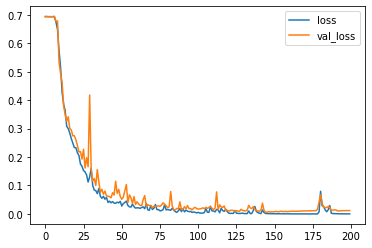

In [18]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

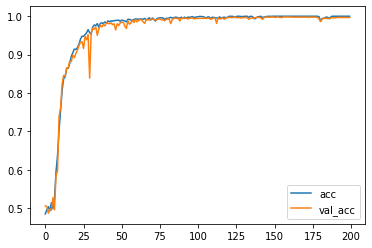

In [19]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [20]:
# Increase Sequence Length 

# For the long distance problem

T = 20
X = []
Y = []

for _ in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # first 3 values - long distance
  Y.append(y)

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)

print("X Shape -", X.shape, "Y Shape -", Y.shape, "Length - ", N)

X Shape - (5000, 20, 1) Y Shape - (5000,) Length -  5000


In [21]:
# SimpleRNN model

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr=0.01),
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 1s 6ms/step - loss: 0.7156 - accuracy: 0.4966 - val_loss: 0.6949 - val_accuracy: 0.4928
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6955 - accuracy: 0.5097 - val_loss: 0.6934 - val_accuracy: 0.4912
Epoch 3/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6946 - accuracy: 0.5015 - val_loss: 0.6949 - val_accuracy: 0.4896
Epoch 4/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6932 - accuracy: 0.5045 - val_loss: 0.6943 - val_accuracy: 0.5072
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6972 - accuracy: 0.4904 - val_loss: 0.6938 - val_accuracy: 0.5024
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.5225 - val_loss: 0.6932 - val_accuracy: 0.5052
Epoch 7/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4848 - val_loss: 0.6938 - val_accuracy: 0.5032
Epoch 8/200
7

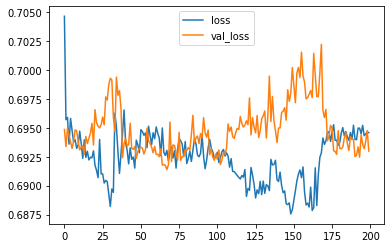

In [22]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

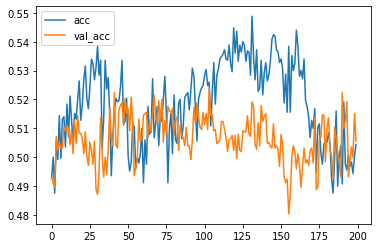

In [23]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [42]:
#GRU

i = Input(shape=(T, D))

# method 1
x = GRU(5, dropout = 0.2)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(lr=0.01),
  metrics=['accuracy'],
)

# train the RNN
r = model.fit(
  X, Y,
  epochs=400,
  validation_split=0.5,
)

Epoch 1/400
79/79 [==============================] - 3s 13ms/step - loss: 0.6966 - accuracy: 0.5047 - val_loss: 0.6947 - val_accuracy: 0.4892
Epoch 2/400
79/79 [==============================] - 1s 9ms/step - loss: 0.6928 - accuracy: 0.4991 - val_loss: 0.6940 - val_accuracy: 0.5100
Epoch 3/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6919 - accuracy: 0.5238 - val_loss: 0.6946 - val_accuracy: 0.4812
Epoch 4/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6952 - accuracy: 0.4897 - val_loss: 0.6942 - val_accuracy: 0.5116
Epoch 5/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6930 - accuracy: 0.5133 - val_loss: 0.6934 - val_accuracy: 0.4948
Epoch 6/400
79/79 [==============================] - 1s 7ms/step - loss: 0.6923 - accuracy: 0.5186 - val_loss: 0.6947 - val_accuracy: 0.4864
Epoch 7/400
79/79 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.5090 - val_loss: 0.6934 - val_accuracy: 0.5104
Epoch 8/400


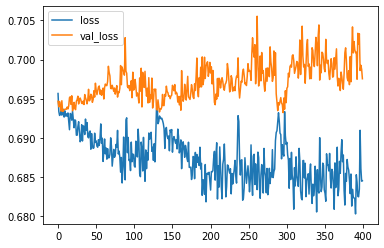

In [43]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

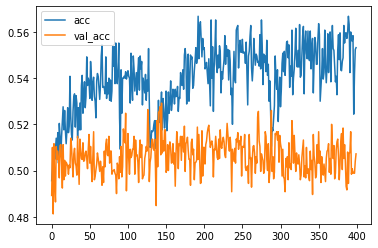

In [44]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [45]:
# LSTM 

i = Input(shape=(T, D))
x = LSTM(5, dropout = 0.2)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    optimizer=Adam(lr = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 2s 14ms/step - loss: 0.6958 - accuracy: 0.4851 - val_loss: 0.6935 - val_accuracy: 0.4952
Epoch 2/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6935 - accuracy: 0.5208 - val_loss: 0.6927 - val_accuracy: 0.5144
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.4991 - val_loss: 0.6930 - val_accuracy: 0.5028
Epoch 4/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6929 - accuracy: 0.5032 - val_loss: 0.6929 - val_accuracy: 0.5152
Epoch 5/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6930 - accuracy: 0.5137 - val_loss: 0.6930 - val_accuracy: 0.5132
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6925 - accuracy: 0.5264 - val_loss: 0.6936 - val_accuracy: 0.4908
Epoch 7/200
79/79 [==============================] - 1s 8ms/step - loss: 0.6937 - accuracy: 0.4894 - val_loss: 0.6929 - val_accuracy: 0.5100
Epoch 8/20

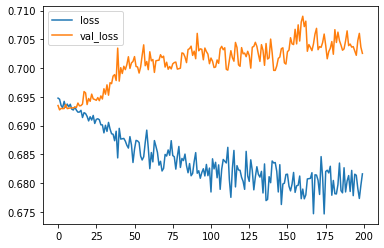

In [46]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

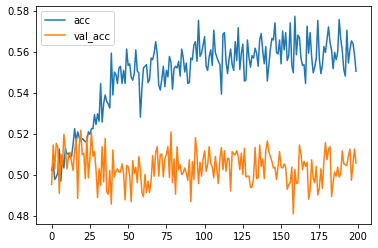

In [47]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [27]:
# Increase Sequence Length EVEN MORE :)

# For the long distance problem

T = 30
X = []
Y = []

for _ in range(5000):
  x = np.random.randn(T)
  X.append(x)
  y = get_label(x, 0, 1, 2) # first 3 values - long distance
  Y.append(y)

X = np.array(X).reshape(-1, T, D)
Y = np.array(Y)
N = len(X)

print("X Shape -", X.shape, "Y Shape -", Y.shape, "Length - ", N)

X Shape - (5000, 30, 1) Y Shape - (5000,) Length -  5000


In [28]:
# SimpleRNN model

i = Input(shape=(T, D))
x = SimpleRNN(5)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    loss = 'binary_crossentropy',
    optimizer = Adam(lr=0.01),
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 1s 7ms/step - loss: 0.7071 - accuracy: 0.5010 - val_loss: 0.6950 - val_accuracy: 0.5084
Epoch 2/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6961 - accuracy: 0.4870 - val_loss: 0.6934 - val_accuracy: 0.5148
Epoch 3/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6929 - accuracy: 0.5325 - val_loss: 0.6933 - val_accuracy: 0.4936
Epoch 4/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4938 - val_loss: 0.6957 - val_accuracy: 0.4900
Epoch 5/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.5109 - val_loss: 0.6938 - val_accuracy: 0.4968
Epoch 6/200
79/79 [==============================] - 0s 4ms/step - loss: 0.6917 - accuracy: 0.5346 - val_loss: 0.6945 - val_accuracy: 0.4944
Epoch 7/200
79/79 [==============================] - 0s 5ms/step - loss: 0.6920 - accuracy: 0.5201 - val_loss: 0.6941 - val_accuracy: 0.5032
Epoch 8/200
7

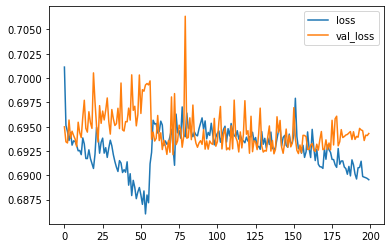

In [29]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

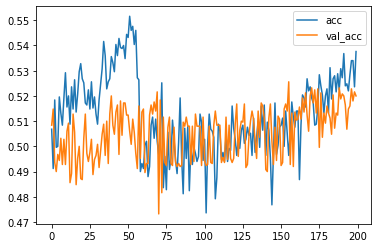

In [30]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [53]:
# LSTM 

i = Input(shape=(T, D))
x = LSTM(15)(i)
x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    optimizer=Adam(lr = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 3s 16ms/step - loss: 0.6945 - accuracy: 0.5053 - val_loss: 0.6934 - val_accuracy: 0.4984
Epoch 2/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6938 - accuracy: 0.4956 - val_loss: 0.6934 - val_accuracy: 0.4928
Epoch 3/200
79/79 [==============================] - 1s 9ms/step - loss: 0.6934 - accuracy: 0.5010 - val_loss: 0.6931 - val_accuracy: 0.5108
Epoch 4/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6938 - accuracy: 0.4943 - val_loss: 0.6938 - val_accuracy: 0.5136
Epoch 5/200
79/79 [==============================] - 1s 10ms/step - loss: 0.6926 - accuracy: 0.5110 - val_loss: 0.6930 - val_accuracy: 0.4896
Epoch 6/200
79/79 [==============================] - 1s 12ms/step - loss: 0.6933 - accuracy: 0.4882 - val_loss: 0.6936 - val_accuracy: 0.4888
Epoch 7/200
79/79 [==============================] - 1s 11ms/step - loss: 0.6928 - accuracy: 0.5093 - val_loss: 0.6935 - val_accuracy: 0.5080
Epoch 8/

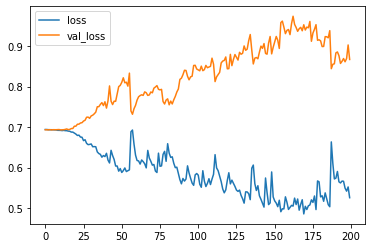

In [54]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

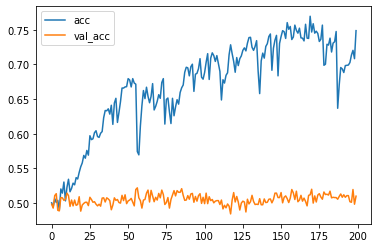

In [55]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()

In [56]:
# A more sophisticated LSTM

# LSTM 

i = Input(shape=(T, D))

x = LSTM(5, return_sequences = True)(i)
x = LSTM(5, return_sequences = True)(x)

x = GlobalMaxPool1D()(x)

x = Dense(1, activation = 'sigmoid')(x)

model = Model(i, x)

model.compile(
    optimizer=Adam(lr = 0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

r = model.fit(X, Y, epochs = 200, validation_split = 0.5)

Epoch 1/200
79/79 [==============================] - 4s 23ms/step - loss: 0.6935 - accuracy: 0.5029 - val_loss: 0.6925 - val_accuracy: 0.5120
Epoch 2/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6925 - accuracy: 0.5158 - val_loss: 0.6947 - val_accuracy: 0.5108
Epoch 3/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6943 - accuracy: 0.5060 - val_loss: 0.6922 - val_accuracy: 0.5112
Epoch 4/200
79/79 [==============================] - 1s 16ms/step - loss: 0.6926 - accuracy: 0.5058 - val_loss: 0.6922 - val_accuracy: 0.5212
Epoch 5/200
79/79 [==============================] - 1s 18ms/step - loss: 0.6924 - accuracy: 0.5321 - val_loss: 0.6911 - val_accuracy: 0.5512
Epoch 6/200
79/79 [==============================] - 2s 20ms/step - loss: 0.6920 - accuracy: 0.5244 - val_loss: 0.6870 - val_accuracy: 0.5232
Epoch 7/200
79/79 [==============================] - 1s 17ms/step - loss: 0.6901 - accuracy: 0.5175 - val_loss: 0.6772 - val_accuracy: 0.5568
Epoch 

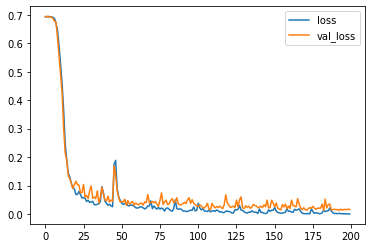

In [57]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

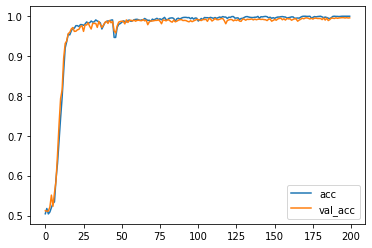

In [58]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')
plt.legend()